##### 發送 LINE Notify ( 文字、表情、圖片 )
這篇教學會使用 PyQt5 設計一個操作介面，在介面中可以輸入文字、貼圖代號以及選擇電腦中的檔案，將這些資料透過 LINE Notify 發送到指定的帳號或群組裡。

##### 預計畫面和功能 
介面裡會包含「輸入文字的欄位」、「傳送表情貼圖的號碼」以及「開啟圖片」的功能，預計完成的畫面如下：

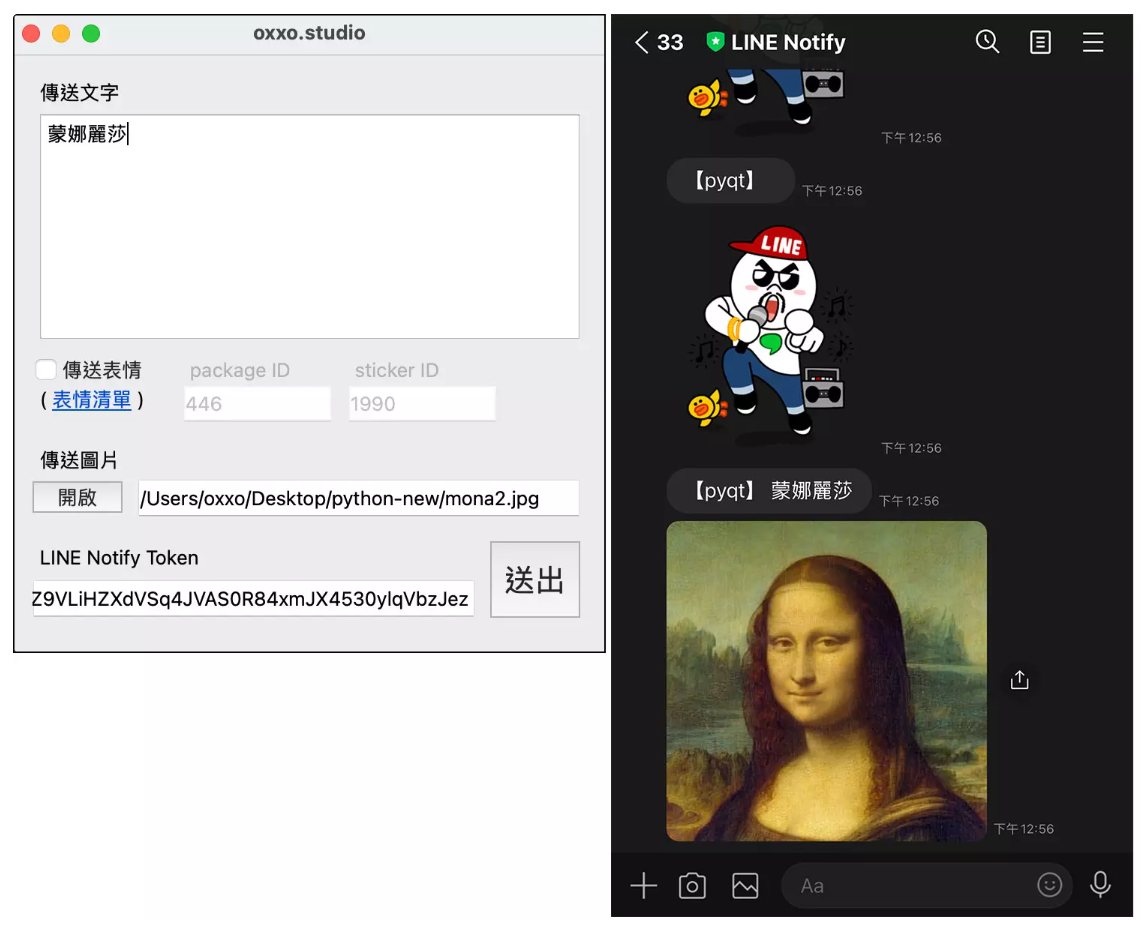

##### 安裝 Requests 函式庫 
發送 LINE Notify 需要透過三方函式庫 Requests 函式庫，如果是使用 Colab 或 Anaconda，預設已經安裝了 requests 函式庫，不用額外安裝，\
如果是本機環境，輸入下列指令，就能安裝 requests 函式庫 ( 依據每個人的作業環境不同，可使用 pip 或 pip3 或 pipenv，更多參考：Requests 函式庫 )。

* pip install requests

##### 完整程式碼 
因為 LINE Notify 可以傳送文字、表情貼圖和圖片，所以可以設計「輸入欄位」以及「開啟檔案」的功能，實作出一個能夠傳送 LINE Notify 訊息的介面，\
程式邏輯設計的重點如下：

* 需要有傳送文字的欄位，如果沒有文字內容，預設會變成「一個空白」( 必須要有一個空白才能傳送文字、表情或圖片 )。
* 因為表情貼圖和圖片只能「擇一傳送」，因此可以使用「勾選方塊」設計出「切換」功能。
* 如果要傳送圖片，可以透過按鈕開啟檔案選取視窗，取得要傳送的圖片路徑，再透過讀取檔案的方式傳送二進位圖片。

In [ ]:
from PyQt5 import QtWidgets
import sys
import requests

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('ZiMing.studio')
Form.resize(400, 400)

# 建立要傳送的變數，預設都是空值
text = ''
img_url = ''
package_id = ''
sticker_id = ''
token = ''
package_id_temp = ''
sticker_id_temp = ''
img_url_temp = ''

# 取得要傳送的文字
def f1():
    global text
    text = input.toPlainText()     # 修改 text 變數內容為輸入欄位裡文字

label_1 = QtWidgets.QLabel(Form)   # 在 Form 裡加入標籤
label_1.setText('傳送文字')         # 設定標籤文字
label_1.setGeometry(20,5,100,40)

input = QtWidgets.QTextEdit(Form)  # QTextEdit 多行輸入框
input.setGeometry(20,40,360,150)
input.setLineWrapMode(input.LineWrapMode.NoWrap) # 設定不要自動換行，除非遇到換行符號
input.textChanged.connect(f1)      # 內容改變時執行 f1 函式

# 勾選傳送貼圖時要做的動作
def sticker():
    global package_id, sticker_id, img_url, package_id_temp, sticker_id_temp, img_url_temp
    # 如果勾選
    if cb.isChecked():
        img_url_temp = img_url         # 將圖片網址存到暫存變數裡
        img_url = ''                   # 清空圖片網址
        package_id = package_id_temp   # 讀取暫存變數的 package ID
        sticker_id = sticker_id_temp   # 讀取暫存變數的 Sticker ID
        label_p.setDisabled(False)     # 啟用表情區域的標籤
        box_p.setDisabled(False)       # 啟用表情區域的輸入欄位
        label_s.setDisabled(False)     # 啟用表情區域的標籤
        box_s.setDisabled(False)       # 啟用表情區域的輸入欄位
        label_img.setDisabled(True)    # 停用圖片區域的標籤
        btn_img.setDisabled(True)      # 停用圖片區域的按鈕
        input_img.setDisabled(True)    # 停用圖片區域的輸入欄位
    else:
        img_url = img_url_temp         # 讀取暫存變數的圖片網址
        package_id_temp = package_id   # 將 package ID 存到暫存變數裡
        sticker_id_temp = sticker_id   # 將 Sticker ID 存到暫存變數裡
        package_id = ''                # 清空 package_id
        sticker_id = ''                # 清空 sticker_id
        label_p.setDisabled(True)      # 停用表情區域的標籤
        box_p.setDisabled(True)        # 停用表情區域的輸入欄位
        label_s.setDisabled(True)      # 停用表情區域的標籤
        box_s.setDisabled(True)        # 停用表情區域的輸入欄位
        label_img.setDisabled(False)   # 啟用圖片區域的標籤
        btn_img.setDisabled(False)     # 啟用圖片區域的按鈕
        input_img.setDisabled(False)   # 啟用圖片區域的輸入欄位

# 按下送出按鈕時，要發送 LINe Notify 的函式
def sendLineNotify(msg='', token='', img_url='', package_id='', sticker_id=''):
    # 如果 msg 為空，將 msg 改成一個空白 ( 必須 )
    if msg == '':
        msg = ' '
    # 如果沒有 token，就不執行傳送命令
    if token != '':
        url = 'https://notify-api.line.me/api/notify'
        token = token
        headers = {
        'Authorization': 'Bearer ' + token
        }
        # 如果具有 package ID 和 Sticker ID
        if package_id != '' and sticker_id != '':
            # 傳送表情貼圖
            data = {
                'message':msg,
                'stickerPackageId':package_id,
                'stickerId':sticker_id
            }
            result = requests.post(url, headers=headers, data=data)
        else:
            # 如果沒有圖片來源網址
            if img_url == '':
                # 傳送文字
                data = {
                    'message':msg
                }
                result = requests.post(url, headers=headers, data=data)
            else:
                data = {
                    'message':msg
                }
                # 傳送夾帶二進位圖片的內容
                image = open(img_url, 'rb')
                imageFile = {'imageFile' : image}
                result = requests.post(url, headers=headers, data=data, files=imageFile)
        print(result)  # 印出傳送結果，200 表示傳送成功

# 輸入表情 ID 的函式
def f2():
    global package_id, sticker_id
    package_id = box_p.text()        # 修改 package_id 變數內容為輸入欄位裡文字
    sticker_id = box_s.text()        # 修改 sticker_id 變數內容為輸入欄位裡文字

cb = QtWidgets.QCheckBox(Form)       # 加入複選按鈕
cb.move(15, 200)
cb.setText('傳送表情')
cb.clicked.connect(sticker)          # 如果勾選，執行 sticker()

label_help = QtWidgets.QLabel(Form)   # 超連結連到 LINE 表情網站
label_help.setText('( <a href="https://developers.line.biz/en/docs/messaging-api/sticker-list/#specify-sticker-in-message-object">表情清單</a> )')        # 設定標籤文字
label_help.setGeometry(20,215,100,30)
label_help.setOpenExternalLinks(True) # 允許超連結

label_p = QtWidgets.QLabel(Form)      # 在 Form 裡加入標籤
label_p.setText('package ID')         # 設定標籤文字
label_p.setGeometry(120,190,100,40)
label_p.setDisabled(True)

box_p = QtWidgets.QLineEdit(Form)     # 加入單行輸入框
box_p.setGeometry(115,220,100,25)
box_p.setDisabled(True)
box_p.textChanged.connect(f2)         # 內容改變時執行 f2()

label_s = QtWidgets.QLabel(Form)      # 在 Form 裡加入標籤
label_s.setText('sticker ID')         # 設定標籤文字
label_s.setGeometry(230,190,100,40)
label_s.setDisabled(True)

box_s = QtWidgets.QLineEdit(Form)     # 加入單行輸入框
box_s.setGeometry(225,220,100,25)
box_s.setDisabled(True)
box_s.textChanged.connect(f2)         # 內容改變時執行 f2()

# 開啟圖片的韓式
def f3():
    filePath , filetype = QtWidgets.QFileDialog.getOpenFileName(filter='IMAGE(*.jpg)')
    input_img.setText(filePath)

# 圖片欄位改變時的函式
def f4():
    global img_url
    img_url = input_img.text()         # 修改 img_url 變數內容為輸入欄位裡文字

label_img= QtWidgets.QLabel(Form)       # 在 Form 裡加入標籤
label_img.setText('傳送圖片')            # 設定標籤文字
label_img.setGeometry(20,255,100,30)

btn_img = QtWidgets.QPushButton(Form)   # 在 Form 中加入一個 QPushButton
btn_img.setText('開啟')                 # 按鈕文字
btn_img.setGeometry(15,280,60,30)
btn_img.clicked.connect(f3)             # 點擊按鈕時執行 f3()

input_img = QtWidgets.QLineEdit(Form)   # 建立單行輸入框
input_img.setGeometry(85,283,295,25)    # 設定位置和尺寸
input_img.textChanged.connect(f4)       # 輸入欄位改變時執行 f4()

# token 欄位內容改變時的函式
def f_token():
    global token
    token = input_token.text()          # 修改 token 變數內容為輸入欄位裡文字

label_token= QtWidgets.QLabel(Form)      # 在 Form 裡加入標籤
label_token.setText('LINE Notify Token') # 設定標籤文字
label_token.setGeometry(20,320,200,30)

input_token = QtWidgets.QLineEdit(Form)   # 建立單行輸入框
input_token.setGeometry(15,350,295,25)    # 設定位置和尺寸
input_token.textChanged.connect(f_token)  # 輸入欄位改變時執行 f_token()

btn_send = QtWidgets.QPushButton(Form)  # 在 Form 中加入一個 QPushButton
btn_send.setText('送出')                 # 按鈕文字
btn_send.setGeometry(320,320,60,60)
btn_send.setStyleSheet('font-size:20px;')
# 點擊按鈕時執行 sendLineNotify()
btn_send.clicked.connect(lambda:sendLineNotify(text, token, img_url, package_id, sticker_id))

Form.show()
sys.exit(app.exec_())

class 寫法：

In [ ]:
from PyQt5 import QtWidgets
import sys
import requests

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(400, 400)
        # 建立要傳送的變數，預設都是空值
        self.text = ''
        self.img_url = ''
        self.package_id = ''
        self.sticker_id = ''
        self.token = ''
        self.package_id_temp = ''
        self.sticker_id_temp = ''
        self.img_url_temp = ''
        self.ui()

    def ui(self):
        self.label_1 = QtWidgets.QLabel(self)   # 在 Form 裡加入標籤
        self.label_1.setText('傳送文字')         # 設定標籤文字
        self.label_1.setGeometry(20,5,100,40)

        self.input = QtWidgets.QTextEdit(self)  # QTextEdit 多行輸入框
        self.input.setGeometry(20,40,360,150)
        self.input.setLineWrapMode(self.input.LineWrapMode.NoWrap) # 設定不要自動換行，除非遇到換行符號
        self.input.textChanged.connect(self.f1)      # 內容改變時執行 f1 函式

        self.cb = QtWidgets.QCheckBox(self)       # 加入複選按鈕
        self.cb.move(15, 200)
        self.cb.setText('傳送表情')
        self.cb.clicked.connect(self.sticker)          # 如果勾選，執行 sticker()

        self.label_help = QtWidgets.QLabel(self)   # 超連結連到 LINE 表情網站
        self.label_help.setText('( <a href="https://developers.line.biz/en/docs/messaging-api/sticker-list/#specify-sticker-in-message-object">表情清單</a> )')        # 設定標籤文字
        self.label_help.setGeometry(20,215,100,30)
        self.label_help.setOpenExternalLinks(True) # 允許超連結

        self.label_p = QtWidgets.QLabel(self)      # 在 Form 裡加入標籤
        self.label_p.setText('package ID')         # 設定標籤文字
        self.label_p.setGeometry(120,190,100,40)
        self.label_p.setDisabled(True)

        self.box_p = QtWidgets.QLineEdit(self)     # 加入單行輸入框
        self.box_p.setGeometry(115,220,100,25)
        self.box_p.setDisabled(True)
        self.box_p.textChanged.connect(self.f2)         # 內容改變時執行 f2()

        self.label_s = QtWidgets.QLabel(self)      # 在 Form 裡加入標籤
        self.label_s.setText('sticker ID')         # 設定標籤文字
        self.label_s.setGeometry(230,190,100,40)
        self.label_s.setDisabled(True)

        self.box_s = QtWidgets.QLineEdit(self)     # 加入單行輸入框
        self.box_s.setGeometry(225,220,100,25)
        self.box_s.setDisabled(True)
        self.box_s.textChanged.connect(self.f2)         # 內容改變時執行 f2()

        self.label_img= QtWidgets.QLabel(self)       # 在 Form 裡加入標籤
        self.label_img.setText('傳送圖片')            # 設定標籤文字
        self.label_img.setGeometry(20,255,100,30)

        self.btn_img = QtWidgets.QPushButton(self)   # 在 Form 中加入一個 QPushButton
        self.btn_img.setText('開啟')                 # 按鈕文字
        self.btn_img.setGeometry(15,280,60,30)
        self.btn_img.clicked.connect(self.f3)             # 點擊按鈕時執行 f3()

        self.input_img = QtWidgets.QLineEdit(self)   # 建立單行輸入框
        self.input_img.setGeometry(85,283,295,25)    # 設定位置和尺寸
        self.input_img.textChanged.connect(self.f4)       # 輸入欄位改變時執行 f4()

        self.label_token= QtWidgets.QLabel(self)      # 在 Form 裡加入標籤
        self.label_token.setText('LINE Notify Token') # 設定標籤文字
        self.label_token.setGeometry(20,320,200,30)

        self.input_token = QtWidgets.QLineEdit(self)   # 建立單行輸入框
        self.input_token.setGeometry(15,350,295,25)    # 設定位置和尺寸
        self.input_token.textChanged.connect(self.f_token)  # 輸入欄位改變時執行 f_token()

        self.btn_send = QtWidgets.QPushButton(self)  # 在 Form 中加入一個 QPushButton
        self.btn_send.setText('送出')                 # 按鈕文字
        self.btn_send.setGeometry(320,320,60,60)
        self.btn_send.setStyleSheet('font-size:20px;')
        # 點擊按鈕時執行 sendLineNotify()
        self.btn_send.clicked.connect(lambda:self.sendLineNotify(self.text, self.token, self.img_url, self.package_id, self.sticker_id))

    # 取得要傳送的文字
    def f1(self):
        self.text = self.input.toPlainText()     # 修改 text 變數內容為輸入欄位裡文字

    # 開啟圖片的韓式
    def f3(self):
        filePath , filetype = QtWidgets.QFileDialog.getOpenFileName(filter='IMAGE(*.jpg)')
        self.input_img.setText(filePath)

    # 輸入表情 ID 的函式
    def f2(self):
        self.package_id = self.box_p.text()        # 修改 package_id 變數內容為輸入欄位裡文字
        self.sticker_id = self.box_s.text()        # 修改 sticker_id 變數內容為輸入欄位裡文字

    # 圖片欄位改變時的函式
    def f4(self):
        self.img_url = self.input_img.text()         # 修改 img_url 變數內容為輸入欄位裡文字

    # token 欄位內容改變時的函式
    def f_token(self):
        self.token = self.input_token.text()          # 修改 token 變數內容為輸入欄位裡文字

    # 勾選傳送貼圖時要做的動作
    def sticker(self):
        # 如果勾選
        if self.cb.isChecked():
            self.img_url_temp = self.img_url         # 將圖片網址存到暫存變數裡
            self.img_url = ''                   # 清空圖片網址
            self.package_id = self.package_id_temp   # 讀取暫存變數的 package ID
            self.sticker_id = self.sticker_id_temp   # 讀取暫存變數的 Sticker ID
            self.label_p.setDisabled(False)     # 啟用表情區域的標籤
            self.box_p.setDisabled(False)       # 啟用表情區域的輸入欄位
            self.label_s.setDisabled(False)     # 啟用表情區域的標籤
            self.box_s.setDisabled(False)       # 啟用表情區域的輸入欄位
            self.label_img.setDisabled(True)    # 停用圖片區域的標籤
            self.btn_img.setDisabled(True)      # 停用圖片區域的按鈕
            self.input_img.setDisabled(True)    # 停用圖片區域的輸入欄位
        else:
            self.img_url = self.img_url_temp         # 讀取暫存變數的圖片網址
            self.package_id_temp = self.package_id   # 將 package ID 存到暫存變數裡
            self.sticker_id_temp = self.sticker_id   # 將 Sticker ID 存到暫存變數裡
            self.package_id = ''                # 清空 package_id
            self.sticker_id = ''                # 清空 sticker_id
            self.label_p.setDisabled(True)      # 停用表情區域的標籤
            self.box_p.setDisabled(True)        # 停用表情區域的輸入欄位
            self.label_s.setDisabled(True)      # 停用表情區域的標籤
            self.box_s.setDisabled(True)        # 停用表情區域的輸入欄位
            self.label_img.setDisabled(False)   # 啟用圖片區域的標籤
            self.btn_img.setDisabled(False)     # 啟用圖片區域的按鈕
            self.input_img.setDisabled(False)   # 啟用圖片區域的輸入欄位

    # 按下送出按鈕時，要發送 LINe Notify 的函式
    def sendLineNotify(self, msg='', token='', img_url='', package_id='', sticker_id=''):
        # 如果 msg 為空，將 msg 改成一個空白 ( 必須 )
        if msg == '':
            msg = ' '
        # 如果沒有 token，就不執行傳送命令
        if token != '':
            url = 'https://notify-api.line.me/api/notify'
            token = token
            headers = {
            'Authorization': 'Bearer ' + token
            }
            # 如果具有 package ID 和 Sticker ID
            if package_id != '' and sticker_id != '':
                # 傳送表情貼圖
                data = {
                    'message':msg,
                    'stickerPackageId':package_id,
                    'stickerId':sticker_id
                }
                result = requests.post(url, headers=headers, data=data)
            else:
                # 如果沒有圖片來源網址
                if img_url == '':
                    # 傳送文字
                    data = {
                        'message':msg
                    }
                    result = requests.post(url, headers=headers, data=data)
                else:
                    data = {
                        'message':msg
                    }
                    # 傳送夾帶二進位圖片的內容
                    image = open(img_url, 'rb')
                    imageFile = {'imageFile' : image}
                    result = requests.post(url, headers=headers, data=data, files=imageFile)
            print(result)  # 印出傳送結果，200 表示傳送成功

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())